In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:
#############################################################
##                                                         ##
##      PROBLEM 5: PRE-PROCESSING GRAYSCALE IMAGES         ##
##                                                         ##
#############################################################

In [3]:
from PIL import Image
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import cv2
%matplotlib inline

In [4]:
image = cv2.imread('119082.jpg',0)
I = np.array(image)

In [5]:
def imhist(im):
  # calculates normalized histogram of an image
    m, n = im.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[im[i, j]]+=1
    return np.array(h)/(m*n)

def cumsum(h):
    # finds cumulative sum of a numpy array, list
    return [sum(h[:i+1]) for i in range(len(h))]

def histeq(im):
    #calculate Histogram
    h = imhist(im)
    cdf = np.array(cumsum(h)) #cumulative distribution function
    sk = np.uint8(255 * cdf) #finding transfer function values
    s1, s2 = im.shape
    Y = np.zeros_like(im)
    # applying transfered values for each pixels
    for i in range(0, s1):
        for j in range(0, s2):
            Y[i, j] = sk[im[i, j]]
    H = imhist(Y)
    #return transformed image, original and new histogram, 
    # and transform function
    return Y , h, H, sk

In [6]:
_,before,after,_ = histeq(I)

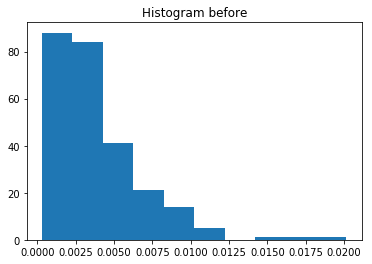

In [7]:
plt.hist(before)
plt.title('Histogram before')

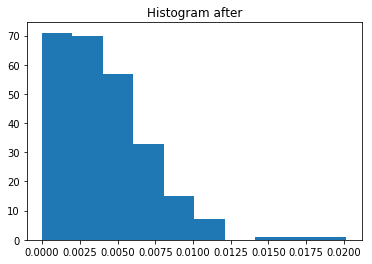

In [8]:
plt.hist(after)
plt.title('Histogram after')

In [9]:
def clipping(im):
    '''
    y = 0         ; 0<=x<a
        beta*(x-a); a<=x<b
        beta*(x-a); b<=x<L
    '''
    clipped = []
    a = 50
    b = 150
    beta = 2
    L = 256
    m = np.shape(im)[0]
    n = np.shape(im)[1]
    
    for i in range(m):
        for j in range(n):
            if im[i][j] >=0 and im[i][j] < a:
                im[i][j] = 0
            elif im[i][j] >= a and im[i][j] < b:
                im[i][j] = beta*(im[i][j]-a)
            elif im[i][j] >= b and im[i][j] < L:
                im[i][j] = beta*(b-a)
    return im

In [10]:
image = cv2.imread('119082.jpg',0)
I = np.array(image)
c = clipping(I)

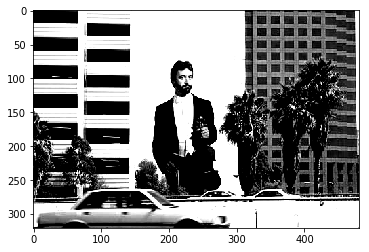

In [11]:
plt.imshow(c, cmap=cm.gray)

In [12]:
def range_compression(im, c):
    '''
    y = c * log10(1+x)
    '''
    m = np.shape(im)[0]
    n = np.shape(im)[1]
    for i in range(m):
        for j in range(n):
            im[i][j] = c * np.log10(1 + im[i][j])
    
    return im

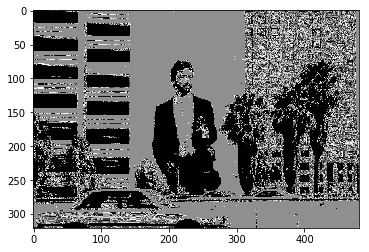

In [13]:
rc1 = range_compression(I,110100)
plt.imshow(rc1,cmap=cm.gray)

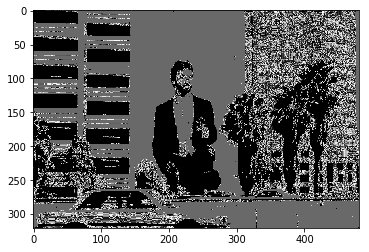

In [14]:
rc2 = range_compression(I,1000)
plt.imshow(rc2,cmap=cm.gray)